# Homework 2

Visualize, describe, and model distributions

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

Here are some of the functions from Chapter 5.

In [2]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label)

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [3]:
def MakeNormalPlot(values, label=''):
    """Generates a normal probability plot.

    values: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs, ys, '+', alpha=0.3, label=label)

Read the GSS data again.

In [4]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

Wall time: 378 ms


(62466, 101)

In [5]:
gss.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,0,0,2,0,26.0,18.0,12,12,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30,2,0,1,38.0,12.0,97,99,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,0,0,7,0,57.0,12.0,7,7,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18,1,6,3,61.0,14.0,8,5,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22,2,3,3,59.0,12.0,6,11,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [6]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

### Distribution of age

Here's the CDF of ages.

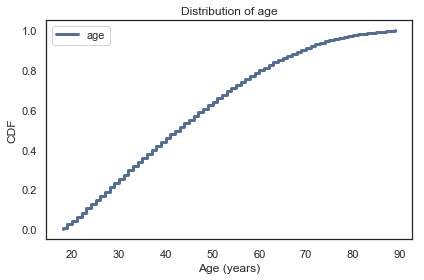

In [7]:
cdf_age = Cdf(gss.age)
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

**Exercise**:  Each of the following cells shows the distribution of ages under various transforms, compared to various models.  In each text cell, add a sentence or two that interprets the result.  What can we say about the distribution of ages based on each figure?

1) Here's the CDF of ages compared to a normal distribution with the same mean and standard deviation.

**Interpretation:** In this figure the normal distrubution does not capture the data very well. The model matches the data near the mean but deviates in both tails.

n, mean, std 62281 44.47905368874617 16.482037485676


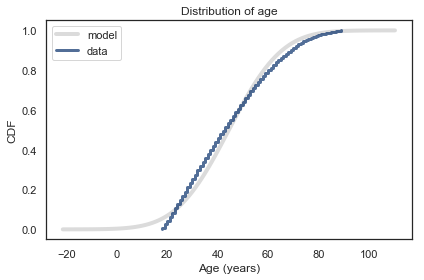

In [8]:
MakeNormalModel(gss.age.dropna(), label='data')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

2) Here's a normal probability plot for the distribution of ages.

**Interpretation:** The normal probability plot fits the data fairly well near the mean but totally deviates in both tails. For the left tail, this makes sense because the respondents were adults, and therefore, they were older than ~25 year olds, while the model continues to negative ages. The same thing also happens to the other end in which the oldest respondents were about 90 years old, but the model continues to above 100 years.

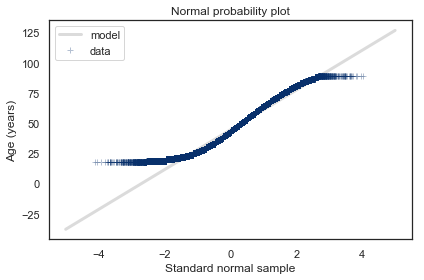

In [9]:
MakeNormalPlot(gss.age.dropna(), label='data')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Age (years)')

3) Here's the complementary CDF on a log-y scale.

**Interpretation:** the complementary CDF plot of Age (years) is not exactly a straight line, which suggests that the expontential distribution is not a good model for the data.

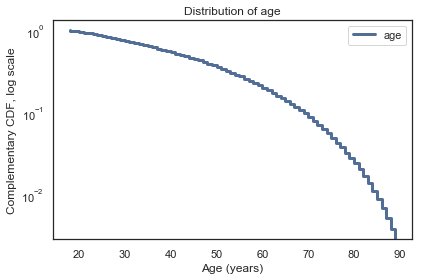

In [10]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF of ages on a log-x scale.

**Interpretation:** the CDF of ages on a log-x scale seems to be a sigmoid curve. However, it's still uncertain whether the lognormal distribution is a good fit for the data.

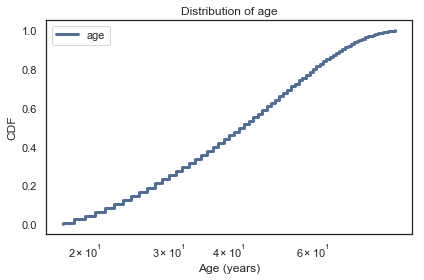

In [11]:
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of ages, compared to a normal model.

**Interpretation:** Compared to the first one, this model seems to fit better especially in both tails. This indicates that the lognormal distribution might be a good model for the data.

n, mean, std 62281 1.6168744157503179 0.16787914328916784


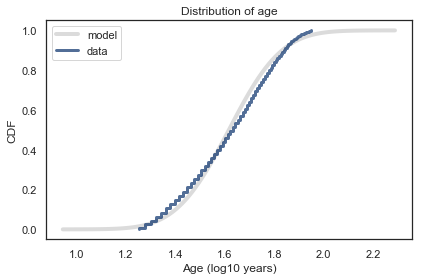

In [12]:
values = np.log10(gss.age.dropna())
MakeNormalModel(values, label='data')
    
decorate(title='Distribution of age', 
         xlabel='Age (log10 years)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of ages.

**Interpretation:** Similar to #2, the normal probability plot fits the data fairly well near the mean but deviates in both tails.

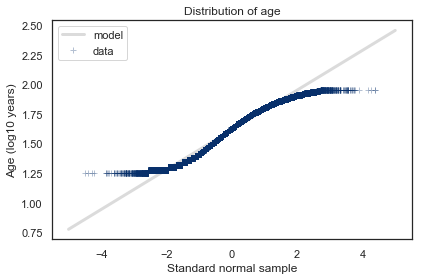

In [13]:
MakeNormalPlot(values, label='data')

decorate(title='Distribution of age', 
         xlabel='Standard normal sample', 
         ylabel='Age (log10 years)')

7) Here's the complementary CDF on a log-log scale.

**Interpretation:** the curve in this plot is not an exact straight line, which indicates that Pareto distribution is not a good fit for this model. However, if we only care about the first part of the curve (x from 20 to 40), which looks quite a straight line, the Pareto distribution can somewhat depict that part of the sample.

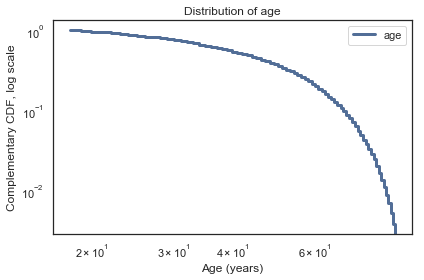

In [14]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether ages are well-modeled by a Weibull distribution.

**Interpretation:** the curve in this model is not a straight line, so the Weibull distribution is not a good fit for the data.

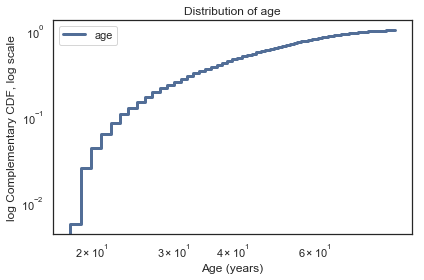

In [15]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

### Distribution of income

Here's the CDF of `realinc`.

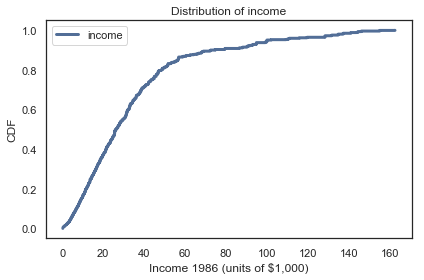

In [16]:
cdf_realinc = Cdf(gss.realinc/1000)
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income 1986 (units of $1,000)', 
         ylabel='CDF')

**Exercise:** Use visualizations like the ones in the previous exercise to see whether there is an analytic model that describes the distribution of `gss.realinc` well.

1) Here's the CDF of ages compared to a normal distribution with the same mean and standard deviation.

**Interpretation:** In this figure the normal distrubution does not capture the data very well. The model does not match the the mean and also deviates in both tails.

n, mean, std 55499 33.8825218130748 28.502895120969328


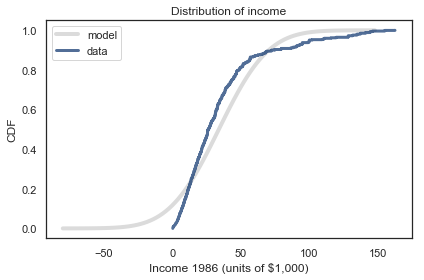

In [17]:
MakeNormalModel(gss.realinc.dropna()/1000, label='data')

decorate(title='Distribution of income', 
         xlabel='Income 1986 (units of $1,000)', 
         ylabel='CDF')

2) Here's a normal probability plot for the values.

**Interpretation:** The data is not a straight line at all but looks like a sigmoid. This model cannot be a good fit for the data.

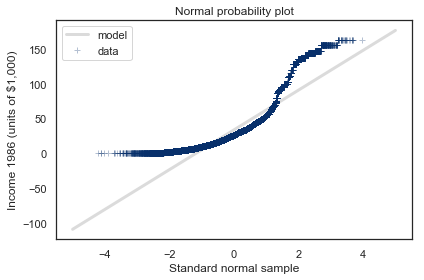

In [18]:
MakeNormalPlot(gss.realinc.dropna()/1000, label='data')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Income 1986 (units of $1,000)')

3) Here's the complementary CDF on a log-y scale.

**Interpretation:** the complementary CDF plot of Income looks like a straight line in the left tail, but it's still hard to tell whether the expontential distribution is a good model for the data.

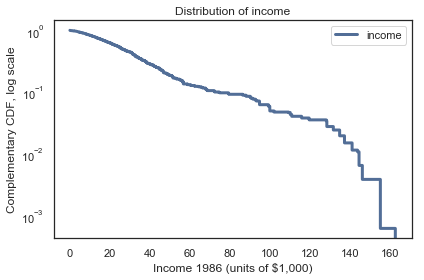

In [19]:
thinkplot.cdf(cdf_realinc, label='income', complement=True)

decorate(title='Distribution of income', 
         xlabel='Income 1986 (units of $1,000)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF on a log-x scale.

**Interpretation:** the CDF of income on a log-x scale looks like a sigmoid function, which suggests that the lognormal distribution can be used to model the data fairly well.

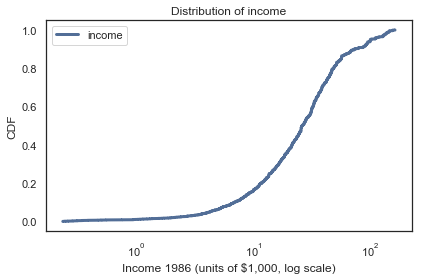

In [20]:
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income 1986 (units of $1,000, log scale)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of the values, compared to a normal model.

**Interpretation:** this distribution models the data really well. This indicates that the lognormal distribution is a good model for the data.

n, mean, std 55499 1.3810317365141316 0.3856600273208646


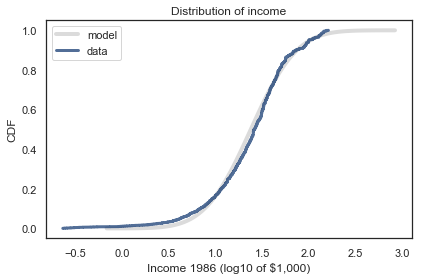

In [21]:
values = np.log10(gss.realinc.dropna()/1000)
MakeNormalModel(values, label='data')

decorate(title='Distribution of income', 
         xlabel='Income 1986 (log10 of $1,000)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of the values.

**Interpretation:** the data deviates substantially from the normal model. One might use this distribution to model the middle part of the data, but apparently it fails to capture the sample as a whole.

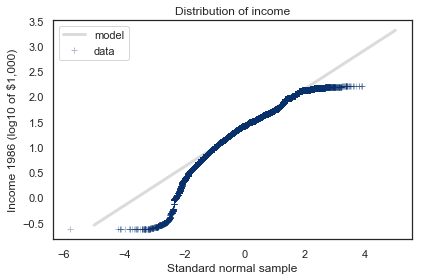

In [22]:
MakeNormalPlot(values, label='data')

decorate(title='Distribution of income', 
         xlabel='Standard normal sample', 
         ylabel='Income 1986 (log10 of $1,000)')

7) Here's the complementary CDF on a log-log scale.

**Interpretation:** the curve in this plot is not an exact straight line, which indicates that Pareto distribution is not a good fit for this model. However, if one only cares about the first part of the curve (x-axis from 0 to 10), which falls perfectly along a straight line, the Pareto distribution can be used to model that part of the sample.

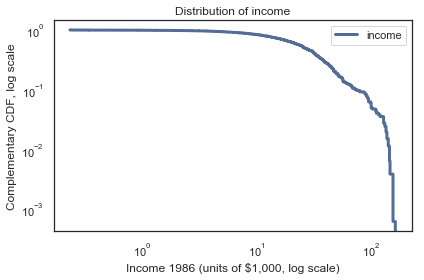

In [23]:
thinkplot.cdf(cdf_realinc, label='income', complement=True)

decorate(title='Distribution of income', 
         xlabel='Income 1986 (units of $1,000, log scale)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether the values are well-modeled by a Weibull distribution.

**Interpretation:** the curve in this model falls along a straight line in the middle part but deviates in both tails. Depending on the purpose, the Weibull distribution can be used to model just the middle part of the sample.

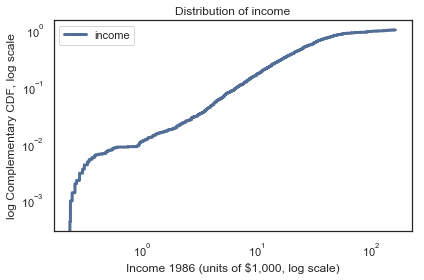

In [24]:
thinkplot.cdf(cdf_realinc, label='income', transform='Weibull')

decorate(title='Distribution of income', 
         xlabel='Income 1986 (units of $1,000, log scale)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

## BRFSS


In [25]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

Wall time: 17.6 ms


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0


Let's look at the distribution of height in the BRFSS dataset.  Here's the CDF.

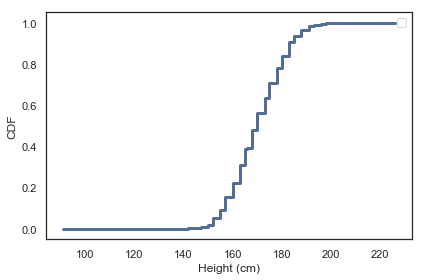

In [26]:
heights = brfss.HTM4

cdf_heights = Cdf(heights)
thinkplot.Cdf(cdf_heights)

decorate(xlabel='Height (cm)', ylabel='CDF')

To see whether a normal model describes this data well, we can use KDE to estimate the PDF.

In [27]:
from scipy.stats import gaussian_kde

Here's an example using the default bandwidth method.

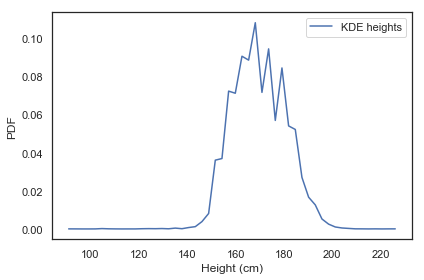

In [28]:
kde = gaussian_kde(heights.dropna())

xs = np.linspace(heights.min(), heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

It doesn't work very well; we can improve it by overriding the bandwidth with a constant.

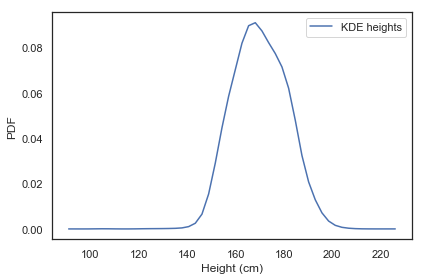

In [29]:
kde = gaussian_kde(heights.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

Now we can generate a normal model with the same mean and standard deviation.

In [30]:
mean = heights.mean()
std = heights.std()

mean, std

(170.09044280714292, 10.795080237191893)

Here's the model compared to the estimated PDF.

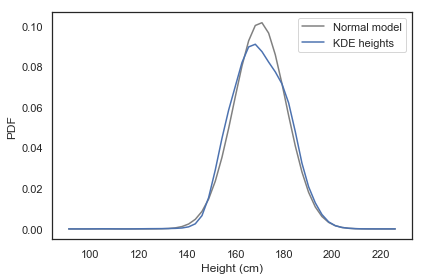

In [31]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

The data don't fit the model particularly well, possibly because the distribution of heights is a mixture of two distributions, for men and women.

**Exercise:** Generate a similar figure for just women's heights and see if the normal model does any better.

**Answer:** the normal model does much better with only women's heights.

In [32]:
# Get DataFrame of women's heights
wm_heights = brfss[brfss['SEX']==2].HTM4

# Use KDE to estimate PDF
xs = np.linspace(wm_heights.min(), wm_heights.max())
kde = gaussian_kde(wm_heights.dropna(), bw_method=0.3)
ds = kde.evaluate(xs)
ds /= ds.sum()

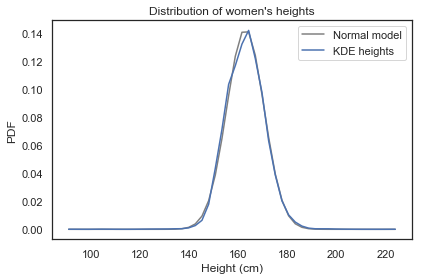

In [33]:
# Calculate mean and standard deviation
mean, std = wm_heights.mean(), wm_heights.std()

# Generate the normal model with the same mean and std
normal_pdf = thinkstats2.NormalPdf(mean, std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

# Plot the results
plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')
decorate(title='Distribution of women\'s heights', xlabel='Height (cm)', ylabel='PDF')

**Exercise:** Generate a similar figure for men's weights, `brfss.WTKG3`.  How well does the normal model fit?

**Answer:** the normal model does not fit the data very well. The data forms a taller belt curve and is skewed a bit to the left. This is probably because of the outliers of men with high weights, which shifts the mean to the right.

In [34]:
# Get DataFrame of women's heights
men_weights = brfss[brfss['SEX']==1].WTKG3

# Use KDE to estimate PDF
xs = np.linspace(men_weights.min(), men_weights.max())
kde = gaussian_kde(men_weights.dropna(), bw_method=0.3)
ds = kde.evaluate(xs)
ds /= ds.sum()

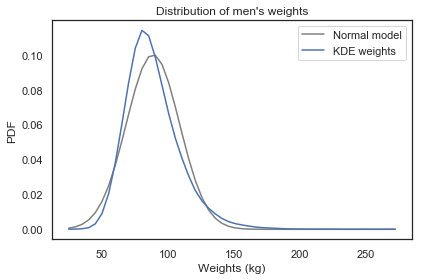

In [35]:
# Calculate mean and standard deviation
mean, std = men_weights.mean(), men_weights.std()

# Generate the normal model with the same mean and std
normal_pdf = thinkstats2.NormalPdf(mean, std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

# Plot the results
plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE weights')
decorate(title='Distribution of men\'s weights', xlabel='Weights (kg)', ylabel='PDF')

**Exercise:** Try it one more time with the log of men's weights.  How well does the normal model fit?  What does that imply about the distribution of weight?

**Answer:** the normal model of the log of men's weights fits the data much better, which implies that the distribution of weight is lognormal.

In [36]:
# Get DataFrame of women's heights
men_weights = brfss[brfss['SEX']==1].WTKG3
log_men_weights = np.log10(men_weights)

# Use KDE to estimate PDF
xs = np.linspace(log_men_weights.min(), log_men_weights.max())
kde = gaussian_kde(log_men_weights.dropna(), bw_method=0.3)
ds = kde.evaluate(xs)
ds /= ds.sum()

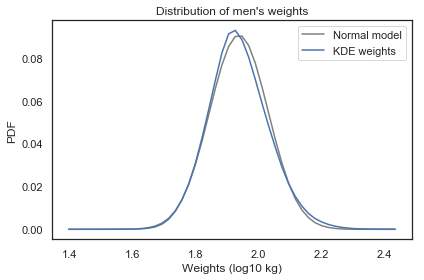

In [37]:
# Calculate mean and standard deviation
mean, std = log_men_weights.mean(), log_men_weights.std()

# Generate the normal model with the same mean and std
normal_pdf = thinkstats2.NormalPdf(mean, std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

# Plot the results
plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE weights')
decorate(title='Distribution of men\'s weights', xlabel='Weights (log10 kg)', ylabel='PDF')

The CDF on a log-x scale looks like a sigmoid function, which also implies that the distribution of weight is lognormal.

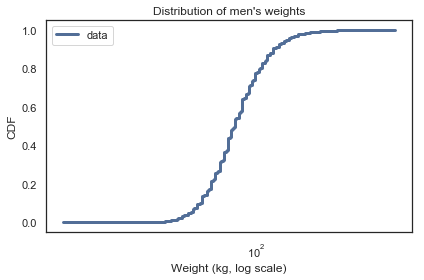

In [38]:
# Plot the CDF on a log-x scale
cdf_men_weights = Cdf(men_weights)
thinkplot.cdf(cdf_men_weights, label='data')

decorate(title='Distribution of men\'s weights', 
         xlabel='Weight (kg, log scale)', 
         ylabel='CDF',
         xscale='log')

## Skewness

Let's look at the skewness of the distribution of weights for men and women.

In [39]:
male = (brfss.SEX == 1)
male_weights = brfss.loc[male, 'WTKG3']

In [40]:
female = (brfss.SEX == 2)
female_weights = brfss.loc[female, 'WTKG3']

As we've seen, these distributions are skewed to the right, so we expect the mean to be higher than the median. 

In [41]:
male_weights.mean(), male_weights.median()

(88.83871202340993, 86.18)

We can compute the moment-based sample skewness using Pandas or `thinkstats2`.  The results are almost the same.

In [42]:
male_weights.skew(), thinkstats2.Skewness(male_weights.dropna())

(1.2607915291363547, 1.2607508370740947)

But moment-based sample skewness is a terrible statistic!  A more robust alternative is Pearson's median skewness:

In [43]:
thinkstats2.PearsonMedianSkewness(male_weights.dropna())

0.3961356157532533

**Exercise:** Compute the same statistics for women.  Which distribution is more skewed?

**Answer:** the female distributions are also skewed to the right. The female distribution is more skewed than the male one becaue the skewness coefficients of the female distribution are all higher.

In [44]:
# Mean and median
female_weights.mean(), female_weights.median()

(73.62438714355793, 70.31)

In [45]:
# Compute moment-based sample skewness
female_weights.skew(), thinkstats2.Skewness(female_weights.dropna())

(1.3693028811523575, 1.3692590742841042)

In [46]:
# Compute Pearson's median skewness
thinkstats2.PearsonMedianSkewness(female_weights.dropna())

0.5268415056705406

**Exercise:** Explore the GSS or BRFSS dataset and find something interesting!

**Answer:** I'd like to find out the relationship 
- between the body mass index (BMI) and income
- between BMI and age

In [47]:
# Calculate the bmi
brfss['bmi'] = brfss.WTKG3/(brfss.HTM4/100)**2
df = brfss.dropna(subset=['WTKG3', 'HTM4', 'INCOME2', 'AGE'])
df.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE,bmi
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0,23.566406
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0,22.195039
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0,27.313787
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0,27.489440
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0,37.667820


According to the plot below, it seems like richer people are more physically fit than poorer ones. The poorest group of people has a very high mean BMI.

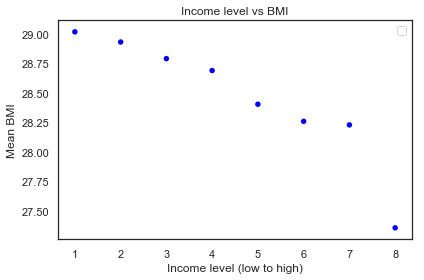

In [48]:
# Group them into income level bins
bins = np.arange(df.INCOME2.min(), df.INCOME2.max() + 1, 1)
indices = np.digitize(df.INCOME2, bins)
groups = df.groupby(indices)

# Calculate mean bmi for each group
# The codebook: https://www.cdc.gov/brfss/annual_data/2014/pdf/codebook14_llcp.pdf
bmis = [group.bmi.mean() for i, group in groups]

# Plot result with Scatter
thinkplot.Scatter(bins, bmis, alpha=1)
decorate(title='Income level vs BMI', 
         xlabel='Income level (low to high)', 
         ylabel='Mean BMI')

The plot below shows that middle-aged people have higher BMI than young adults and old people.

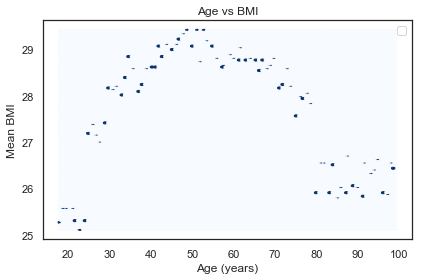

In [49]:
# Group them into age bins
bins = np.arange(df.AGE.min(), df.AGE.max() + 1, 1)
indices = np.digitize(df.AGE, bins)
groups = df.groupby(indices)

# Calculate mean bmi for each group
bmis = [group.bmi.mean() for i, group in groups]

# Plot result using HexBin
thinkplot.HexBin(bins, bmis)
decorate(title='Age vs BMI', 
         xlabel='Age (years)', 
         ylabel='Mean BMI')